# Week 34
### Kjersti Stangeland, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Exercise 3 - Fitting an OLS model to data

Great job on getting through all of that! Now it is time to do some actual machine learning!

a) Complete the code below so that you fit a second order polynomial to the data. You will need to look up some scikit-learn documentation online (look at the imported functions for hints).

b) Compute the mean square error for the line model and for the second degree polynomial model.

In [18]:
n = 100  # number of data points
x = np.random.rand(n, 1)  # input
y = 2.0 + 5 * x**2 + 0.1 * np.random.randn(n, 1)  # truth we want to reproduce with model

line_model = LinearRegression().fit(x, y)
line_predict = line_model.predict(x)
line_mse = mean_squared_error(y, line_predict)
line_mse

0.1317395935564046

I will try to write the step out to see check my understanding. 

We have some random function y which is our truth/data and is what we want to model and reproduce. Our y is a second order polynomial. Thus using a simple linear regression of the form $ \tilde y = \alpha + \beta x$ will not caoture the true nature of the data. 

Text(0.5, 1.0, 'Line model')

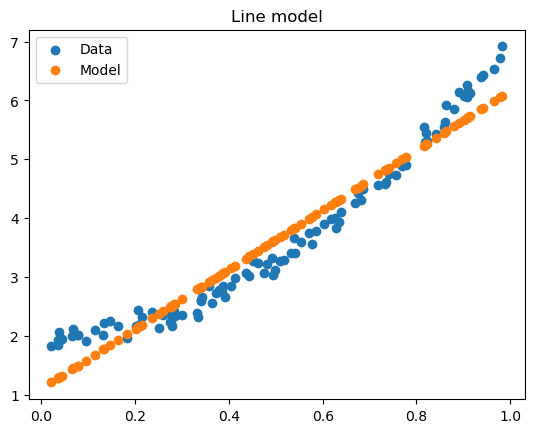

In [35]:
plt.scatter(x, y, label = "Data")
plt.scatter(x, line_predict, label = "Model")
plt.legend()
plt.title('Line model')

In [36]:
poly_features = PolynomialFeatures(2)
x_poly = poly_features.fit_transform(x)
poly_model = LinearRegression().fit(x_poly, y)
poly_predict = poly_model.predict(x_poly)
poly_mse = mean_squared_error(y, poly_predict)
poly_mse

0.011992725053037062

Here we instead make a model which is a second order polynomial of the form $\tilde y = \alpha + \beta x + \delta x^2$ which is of the same form as our data ( minus the noise).

Text(0.5, 1.0, 'Second order polynomial model')

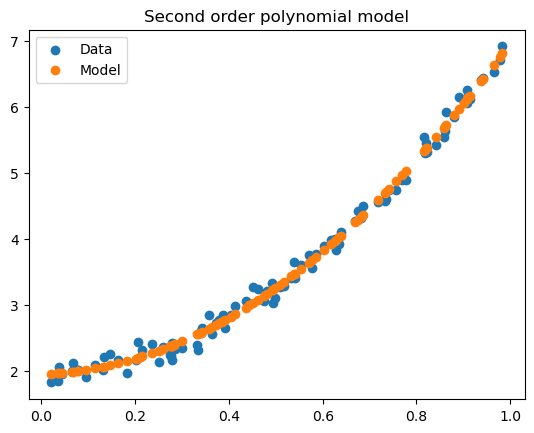

In [37]:
plt.scatter(x, y, label = "Data")
plt.scatter(x, poly_predict, label = "Model")
plt.legend()
plt.title('Second order polynomial model')

## Exercise 4 - The train-test split

Hopefully your model fit the data quite well, but to know how well the model actually generalizes to unseen data, which is most often what we care about, we need to split our data into training and testing data.

In [9]:
from sklearn.model_selection import train_test_split

a) Complete the code below so that the polynomial features and the targets y get split into training and test data.

b) What is the shape of X_test?

c) Fit your model to X_train

d) Compute the MSE when your model predicts on the training data and on the testing data, using y_train and y_test as targets for the two cases.

e) Why do we not fit the model to X_test?

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)

In [55]:
# b)
print(np.shape(X_test))
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(y_test))

(20, 3)
(80, 3)
(80, 1)
(20, 1)


In [58]:
# c)
train_model = LinearRegression().fit(X_train, y_train)

train_predictions = poly_model.predict(X_train)
test_predictions = poly_model.predict(X_test)

In [57]:
# d)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)


print(f'Training data pred. MSE: {train_mse}')
print(f'Test data pred. MSE: {test_mse}')

Training data pred. MSE: 0.011386203133267866
Test data pred. MSE: 0.014418812732113831


e) 

We split the data to train our model on parts of the data and test how well it performs on the test data which the model has not seen before. So the etst set is used to evaluate the eprformance of the model after it has been trained. So to fit the model to X_test would be contradictionary as we want an unbiased test of the model on data the model has not been trained on.